<a href="https://colab.research.google.com/github/dhanyaece/FDP/blob/main/Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Xception**

**VGG16**

**VGG19**

**ResNet50 -- ie using skip connections**

**Global average pooling can be used to convert into a 1D vector instead of flattening**

**to hadle overfitting we can use drop out**

**In transfer learning also we can fine tune some weights ifr needed**

In [9]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.9.2


In [ ]:
! unzip '/content/drive/MyDrive/ASIET/Flower_dataset.zip' -d '/content/drive/MyDrive/ASIET/Flower Dataset'

In [ ]:
imgFiles =glob.glob("/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/*/*.jpg")
for items in imgFiles[:8]:
  print(items)

/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/1031799732_e7f4008c03.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/102841525_bd6628ae3c.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/100080576_f52e8ee070_n.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/1150395827_6f94a5c6e4_n.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/107592979_aaa9cdfe78_m.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/11642632_1e7627a2cc.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/1140299375_3aa7024466.jpg
/content/drive/MyDrive/ASIET/Flower Dataset/tiny_FR/daisy/105806915_a9c13e2106_n.jpg


In [ ]:
x=[]
y=[]
for fName in imgFiles:
  x_i = Image.open(fName)
  x_i =x_i.resize((299,299)) # resize all images to same size
  x_i= np.array(x_i)/255.0   #normalize all values between 0 and 1
  x.append(x_i)
  label = fName.split("/") # to find the label from the folder name
  y_i =label[7] #ie split by / the folder location will give class name in the seventh position
  y_i # will be the last read folder name
  y.append(y_i)

In [ ]:
from sklearn.preprocessing import LabelEncoder
IEncoder=LabelEncoder()
y=IEncoder.fit_transform(y)
print(y)
print(set(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [ ]:
print(IEncoder.classes_)

['daisy' 'dandelion' 'rose' 'sunflower' 'tulip']


In [ ]:
x=np.array(x)
y=np.array(y)
print(x.shape)
print(y.shape)

(500, 299, 299, 3)
(500,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    stratify=y, random_state=42)

print("X_train_shape: {}".format(X_train.shape))
print("X_test_shape: {}".format(X_test.shape))

X_train_shape: (400, 299, 299, 3)
X_test_shape: (100, 299, 299, 3)



**Pretrained models require 3-channel data as input**

If using grayscale (1-channel), make the following conversion:

    X_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_train))

    X_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test))

    print(X_train.shape)



In [ ]:
#standard scaling 
mu = X_train.mean()
std = X_train.std()

X_train_std = (X_train-mu)/std
X_test_std = (X_test-mu)/std


**Keras Applications**

https://keras.io/api/applications/


91884032/91884032 [==============================] - 0s 0us/step


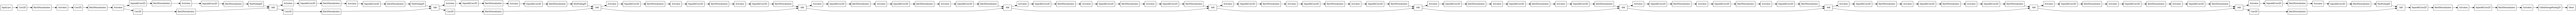

In [ ]:
# Retrieve the Xception model from Keras
#view the entire model  
Xception_model = keras.applications.Xception()

tf.keras.utils.plot_model(
    Xception_model,
    to_file='Xmodel.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)
     

**the model will be saved as Xmodel.png**


***where the global average pooling starts the classifier ***


**For transfer learning**

   ** include_top=False**

  ** no need to include top layer.. we are giving our input** 


   ** weights = 'imagenet**

  ** weights we are using the same weights**

   #https://keras.io/api/applications/



83683744/83683744 [==============================] - 1s 0us/step


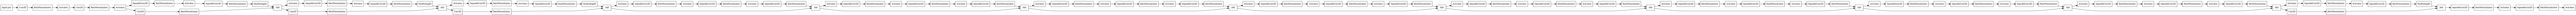

In [ ]:
# Take only the feature extractor part

base_model = keras.applications.Xception(weights='imagenet', 
                                                  include_top=False)

# Visualize the extractor part for transfer learning

tf.keras.utils.plot_model(
    base_model,
    to_file='baseModel.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)

**now we have layers upto global average pooling**

In [ ]:
# Make the weights/parameters of fetaure extractor non-trainable
# Freeze the weights - will not be updated during backpropagation
for layer in base_model.layers:
  layer.trainabe = False


**Add classifier part**

    Global Average Pooling - 2D
    Output layer (5 units (because 5-class classificaiton problem)



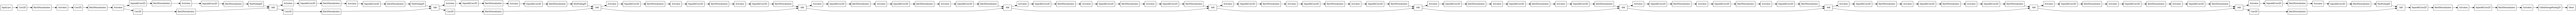

In [ ]:

# Adding classifier
#Inspect how flattening is made in the pretrained model. In Xception, they use GAP
global_pool = keras.layers.GlobalAveragePooling2D()(base_model.output)

output_ = keras.layers.Dense(units=5, activation='softmax')(global_pool)

model_TL = keras.models.Model(inputs=[base_model.input], outputs=[output_])

# Visualize the complete model
tf.keras.utils.plot_model(
    model_TL,
    to_file='Model_TL.png',
    show_shapes=False,
    show_layer_names=False,
    rankdir='LR',
    expand_nested=False,
    dpi=96
)
     


**Compile and train the model**
Save the best weights while training

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint


**verbose =1 display the best model with best val_accuracy**

In [ ]:
model_TL.compile(loss='sparse_categorical_crossentropy', 
                 optimizer='adam', 
                 metrics=['accuracy'])
#introduce callbacks to save the best model


callbacks_TL = [            
             keras.callbacks.ModelCheckpoint("bestTL.h5",
                                             monitor='val_accuracy',verbose=1,
                                             save_weights_only=True,
                                             save_best_only=True)]


history_TL = model_TL.fit(x = X_train_std, y = y_train, epochs=50, 
                          validation_split=0.1, batch_size=16, callbacks=callbacks_TL)

Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 0.6950 - accuracy: 0.7472
Epoch 1: val_accuracy improved from -inf to 0.67500, saving model to bestTL.h5
23/23 [==============================] - 29s 655ms/step - loss: 0.6950 - accuracy: 0.7472 - val_loss: 1.8044 - val_accuracy: 0.6750
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 0.2822 - accuracy: 0.9250
Epoch 2: val_accuracy did not improve from 0.67500
23/23 [==============================] - 13s 547ms/step - loss: 0.2822 - accuracy: 0.9250 - val_loss: 14.7829 - val_accuracy: 0.5750
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 0.2524 - accuracy: 0.9222
Epoch 3: val_accuracy did not improve from 0.67500
23/23 [==============================] - 13s 546ms/step - loss: 0.2524 - accuracy: 0.9222 - val_loss: 13.6017 - val_accuracy: 0.4250
Epoch 4/50
23/23 [==============================] - ETA: 0s - loss: 0.2402 - accuracy: 0.9278
Epoch 4: val_accuracy did not improve from 0.

In [10]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_TL.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()

NameError: ignored

In [7]:
#Evaluate the model 

testLoss_TL, testAccuracy_TL = model_TL.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))
     

NameError: ignored


**Update the model with best weights**

    These weights may be from an intermediate epoch



In [6]:
model_TL.load_weights("bestTL.h5")

testLoss_TL, testAccuracy_TL = model_TL.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_TL, testAccuracy_TL))

NameError: ignored


**Save the model & dataset(for finetuning)**

In [11]:
# Saves the best model obtained in drive( if not saved in drive)
# ie the weights of all the model are stored
model_FineTune = keras.models.load_model('/content/drive/MyDrive/Models/01_Xception_TransferLearning_Best_Model.h5')

In [ ]:
from numpy import save
#.npy is numpy array format 
# to save the data as array format ... ie from next experiment no need to start from image

save('/content/drive/MyDrive/Models/X_train_std.npy', X_train_std)
save('/content/drive/MyDrive/Models/X_test_std.npy', X_test_std)

save('/content/drive/MyDrive/Models/y_train.npy', y_train)
save('/content/drive/MyDrive/Models/y_test.npy', y_test)
     

**FINE TUNING**

In [12]:
# load numpy array from npy file
from numpy import load

X_train_std = load('/content/drive/MyDrive/Models/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Models/X_test_std.npy')

y_train = load('/content/drive/MyDrive/Models/y_train.npy')
y_test = load('/content/drive/MyDrive/Models/y_test.npy')

In [13]:
print("X_train_std_shape: {}".format(X_train_std.shape))
print("X_test_std_shape: {}".format(X_test_std.shape))
     

X_train_std_shape: (400, 299, 299, 3)
X_test_std_shape: (100, 299, 299, 3)


In [14]:
# Load the saved best model

model_FineTune = keras.models.load_model('/content/drive/MyDrive/Models/01_Xception_TransferLearning_Best_Model.h5')

In [15]:

model_FineTune.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                           

In [16]:


model_FineTune.layers
     


In [17]:

len(model_FineTune.layers)

134


**Freeze only first 60 layers**

    It is a hyperparameter



In [18]:
# Fine-tune the model from index 60 onwards

for layer in model_FineTune.layers[:60]:
  layer.trainable = False

for layer in model_FineTune.layers[60:]:
  layer.trainable = True


**Compile and train the model**

    Save the best weights while training



In [19]:
model_FineTune.compile(loss='sparse_categorical_crossentropy', 
                 optimizer='adam', 
                 metrics=['accuracy'])

callbacks_FineTune = [            
             keras.callbacks.ModelCheckpoint("bestFT.h5",
                                             monitor='val_accuracy',
                                             save_weights_only=True,
                                             save_best_only=True)
]

history_FineTune = model_FineTune.fit(x = X_train_std, y = y_train, epochs=50,
                                      validation_split=0.1, batch_size=16, callbacks=callbacks_FineTune)

Epoch 1/50
23/23 [==============================] - 20s 347ms/step - loss: 0.0933 - accuracy: 0.9806 - val_loss: 0.7622 - val_accuracy: 0.8750
Epoch 2/50
23/23 [==============================] - 6s 259ms/step - loss: 0.0486 - accuracy: 0.9806 - val_loss: 1.0124 - val_accuracy: 0.8000
Epoch 3/50
23/23 [==============================] - 6s 257ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.6742 - val_accuracy: 0.8250
Epoch 4/50
23/23 [==============================] - 6s 257ms/step - loss: 0.0140 - accuracy: 0.9972 - val_loss: 0.7387 - val_accuracy: 0.8500
Epoch 5/50
23/23 [==============================] - 6s 257ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.6403 - val_accuracy: 0.8500
Epoch 6/50
23/23 [==============================] - 6s 255ms/step - loss: 9.8058e-04 - accuracy: 1.0000 - val_loss: 0.5953 - val_accuracy: 0.8500
Epoch 7/50
23/23 [==============================] - 6s 253ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7204 - val_accuracy: 0.8500
E

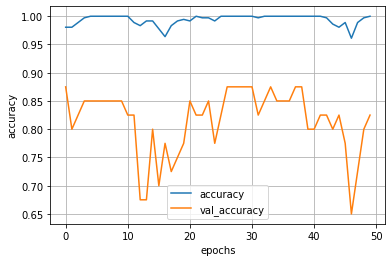

In [20]:
keys = ['accuracy', 'val_accuracy']
progress = {k:v for k,v in history_FineTune.history.items() if k in keys}

import pandas as pd
pd.DataFrame(progress).plot()

plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.grid(True)
plt.show()


**Evaluate the fine-tuned model**

    Trained for 50-epochs



In [21]:


testLoss_FineTune, testAccuracy_FineTune = model_FineTune.evaluate(x = X_test_std, y = y_test)
print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))
     


4/4 [==============================] - 2s 270ms/step - loss: 0.8343 - accuracy: 0.8600
Test-loss: 0.834295, Test-accuracy: 0.860000



**Update the model with best weights and evaluate**

    Saved based on the callback



In [22]:
model_FineTune.load_weights("bestFT.h5")

testLoss_FineTune, testAccuracy_FineTune = model_FineTune.evaluate(x = X_test_std, y = y_test)

print("Test-loss: %f, Test-accuracy: %f" % (testLoss_FineTune, testAccuracy_FineTune))

4/4 [==============================] - 1s 160ms/step - loss: 0.6338 - accuracy: 0.8200
Test-loss: 0.633782, Test-accuracy: 0.820000


**Get the prediction of a single sample**

In [23]:

cProba = model_FineTune.predict(X_test_std[:1])

print(cProba)
     

1/1 [==============================] - 1s 1s/step
[[5.5648172e-05 2.2061964e-04 8.1786531e-01 1.5124625e-01 3.0612165e-02]]


In [24]:


cLabel = np.argmax(cProba, axis=-1) 

print(cLabel)
     


[2]


In [25]:


print(y_test[:1])
     


[2]


**Save the final Fine-Tuned model**

In [26]:

# Saves the best model obtained
model_FineTune.save('/content/drive/MyDrive/Models/02_Xception_FineTuned_Best_Model.h5')